In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import stats
from scipy import spatial
import gaussian
import matplotlib.pyplot as plt

In [2]:
# Import training data

train = np.genfromtxt('data/trn_data.csv', delimiter=',',skip_header=True)
print train[:5], train.shape

[[  40.582 -119.79    84.929]
 [  41.983 -123.6     87.388]
 [  41.85  -123.97    36.259]
 [  42.07  -123.01    84.913]
 [  41.953 -121.58    66.445]] (414, 3)


In [20]:
stats.describe(train[:,-1])

DescribeResult(nobs=414, minmax=(3.1692999999999998, 134.25), mean=70.239483816425121, variance=717.7203728115777, skewness=-0.14928497285720768, kurtosis=-0.7441244511130987)

In [3]:
# Import test data

test = np.genfromtxt('data/tst_locations.csv', delimiter=',',skip_header=True)
print test[:5], test.shape

[[  41.988 -123.72 ]
 [  41.883 -124.13 ]
 [  41.833 -123.83 ]
 [  41.999 -121.7  ]
 [  41.928 -122.44 ]] (413, 2)


In [4]:
# Create model object from training data

kriging = gaussian.SimpleKriging(training_data=train)

In [5]:
# Return prediction means for test data from trained model

predict = kriging.predict(test_data=test, l=.5, sigma=.2)
predict[:5]

array([[ 70.94340417],
       [ 23.70437824],
       [ 49.57131344],
       [ 71.06713418],
       [ 70.69029366]])

In [6]:
# Simulate
coords = np.concatenate((train[:, :-1], test), axis=0)
coords[:5,:]

array([[  40.582, -119.79 ],
       [  41.983, -123.6  ],
       [  41.85 , -123.97 ],
       [  42.07 , -123.01 ],
       [  41.953, -121.58 ]])

In [7]:
bounding_box = [coords[:,0].min(), coords[:,0].max(), coords[:,1].min(), coords[:,1].max()]
print bounding_box

[32.604999999999997, 42.07, -124.25, -114.48999999999999]


In [8]:
simulate = kriging.simulate(bbox=bounding_box, ncells=50, l=.55, sigma=0.2, indices=True)

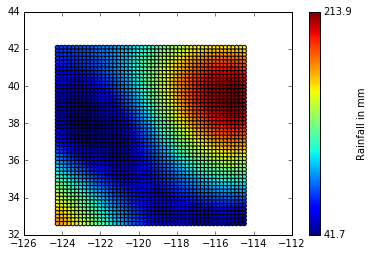

In [9]:
viz = kriging.simulate(bbox=bounding_box, ncells=50, l=5, sigma=0.2, indices=True, show_visual=True, save_visual='sim.png')

In [10]:
viz

array([[  42.07      , -114.49      ,  153.31360673],
       [  41.87683673, -114.49      ,  160.54531996],
       [  41.68367347, -114.49      ,  167.41920609],
       ..., 
       [  32.99132653, -124.25      ,  166.85669115],
       [  32.79816327, -124.25      ,  169.93491326],
       [  32.605     , -124.25      ,  172.52353937]])

In [11]:
rmse_opt=1000000
l = 0.5
sigma = 2
k_folds = 5

for l in np.arange(0.0, 20.0, 0.5):

    #Define K-Fold Cross Validation

    for k in range(k_folds):
        folds = np.array_split(train, k_folds)
        testing = folds[k]
        training = np.concatenate(folds)

        krig = gaussian.SimpleKriging(training_data=training)
        pred = krig.predict(test_data=testing[:,:2], l=l, sigma=sigma)
        rmse = np.sqrt((pred - testing[:, :-1]) ** 2).mean()

        if rmse < rmse_opt:
            rmse_opt = rmse
            l_final = l

print rmse_opt, l_final

gaussian.py:8: RuntimeWarning: divide by zero encountered in divide
  k = np.exp(-(d ** 2) / (2 * l * l))
gaussian.py:8: RuntimeWarning: invalid value encountered in divide
  k = np.exp(-(d ** 2) / (2 * l * l))


87.837775106 0.5


In [16]:
gaussian.cross_validate(train,
                        l_values=np.arange(0.0, 10, 1)[1:],
                        sigma_values=np.arange(0.0, 0.5, 0.05)[1:],
                        rmse_opt=1000,
                        k_folds=5)

l=1.0, sigma=0.05, rmse=99.8874339499
l=1.0, sigma=0.1, rmse=99.8958287394
l=1.0, sigma=0.15, rmse=99.7953792789
l=1.0, sigma=0.2, rmse=99.6443173756
l=1.0, sigma=0.25, rmse=99.4695100506
l=1.0, sigma=0.3, rmse=99.2879634435
l=1.0, sigma=0.35, rmse=99.1223467565
l=1.0, sigma=0.4, rmse=98.9566473873
l=1.0, sigma=0.45, rmse=98.7900705172
l=2.0, sigma=0.05, rmse=98.7478412911
l=2.0, sigma=0.1, rmse=98.4946402365
l=2.0, sigma=0.15, rmse=98.4333575312
l=2.0, sigma=0.2, rmse=98.3804483234
l=2.0, sigma=0.25, rmse=98.3178669049
l=2.0, sigma=0.3, rmse=98.2307351509
l=2.0, sigma=0.35, rmse=98.1254558893
l=2.0, sigma=0.4, rmse=98.0063243979
l=2.0, sigma=0.45, rmse=97.8758155414
l=3.0, sigma=0.05, rmse=98.5469321775
l=3.0, sigma=0.1, rmse=98.3360335804
l=3.0, sigma=0.15, rmse=98.0977565286
l=3.0, sigma=0.2, rmse=97.8726482524
l=3.0, sigma=0.25, rmse=97.6713413444
l=3.0, sigma=0.3, rmse=97.5234147903
l=3.0, sigma=0.35, rmse=97.387029729
l=3.0, sigma=0.4, rmse=97.2463453964
l=3.0, sigma=0.45, rmse=9

(8.0, 0.45000000000000001, 95.996863523066224)

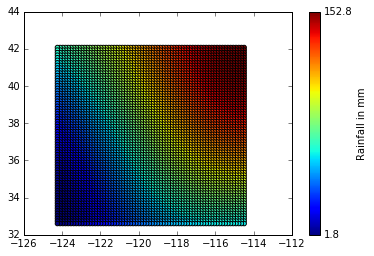

In [24]:
viz = kriging.simulate(bbox=bounding_box, ncells=70, l=8.0, sigma=0.45, indices=True, show_visual=True, save_visual='sim.png')